Assignment 4

Haoyuan Qin

The data set I am using is TMNIST-Alphabet (94 characters and over 281,000 images)

Autoencoder

An autoencoder is a type of artificial neural network used to learn efficient codings of unlabeled data (unsupervised learning).The encoding is validated and refined by attempting to regenerate the input from the encoding. The autoencoder learns a representation (encoding) for a set of data, typically for dimensionality reduction, by training the network to ignore insignificant data (“noise”).

In [1]:
import numpy as np
import pandas as pd

from keras.models import Model
from keras.layers import *
from keras import backend as K

In [2]:

# tmnist data
df_train = pd.read_csv('94_character_TMNIST.csv')
X = df_train.iloc[:, 2:786]
print(X.shape)


(274093, 784)


In [3]:

train_pct_index = int(0.8 * len(X))
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
X_train = X_train.values.astype('float32')/255.
X_test = X_test.values.astype('float32')/255.
output_X_train = X_train.reshape(-1,28,28,1)
output_X_test = X_test.reshape(-1,28,28,1)

print(X_train.shape, X_test.shape)

(219274, 784) (54819, 784)


In [4]:

import os 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

encoder_inputs = Input(shape = (28,28,1))
 
conv1 = Conv2D(16, (3,3), activation = 'relu', padding = "SAME")(encoder_inputs)
pool1 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv1)
conv2 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(pool1)
pool2 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv2)
flat = Flatten()(pool2)
 
encoder_outputs = Dense(32, activation = 'relu')(flat)

I design a neural network architecture such that we impose a bottleneck in the network which forces a compressed knowledge representation of the original input. If the input features were each independent of one another, this compression and subsequent reconstruction would be a very difficult task. However, if some sort of structure exists in the data, this structure can be learned and consequently leveraged when forcing the input through the network's bottleneck.

First

In [5]:
#AE decoder
dense_layer_d = Dense(7*7*32, activation = 'relu')(encoder_outputs)
output_from_d = Reshape((7,7,32))(dense_layer_d)
conv1_1 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(output_from_d)
upsampling_1 = Conv2DTranspose(32, 3, padding='same', activation='relu', strides=(2, 2))(conv1_1)
upsampling_2 = Conv2DTranspose(16, 3, padding='same', activation='relu', strides=(2, 2))(upsampling_1)
decoded_outputs = Conv2DTranspose(1, 3, padding='same', activation='relu')(upsampling_2)

#AE
autoencoder = Model(encoder_inputs, decoded_outputs)

m = 128
n_epoch = 10
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(output_X_train,output_X_train, epochs=n_epoch, batch_size=m, shuffle=True)


Epoch 1/10
1714/1714 [==============================] - 387s 225ms/step - loss: 0.1792
Epoch 2/10
1714/1714 [==============================] - 340s 198ms/step - loss: 0.1495
Epoch 3/10
1714/1714 [==============================] - 330s 192ms/step - loss: 0.1602
Epoch 4/10
1714/1714 [==============================] - 330s 192ms/step - loss: 0.1421
Epoch 5/10
1714/1714 [==============================] - 326s 190ms/step - loss: 0.1393
Epoch 6/10
1714/1714 [==============================] - 324s 189ms/step - loss: 0.1340
Epoch 7/10
1714/1714 [==============================] - 317s 185ms/step - loss: 0.1335
Epoch 8/10
1714/1714 [==============================] - 318s 186ms/step - loss: 0.1263
Epoch 9/10
1714/1714 [==============================] - 320s 187ms/step - loss: 0.1271
Epoch 10/10
1714/1714 [==============================] - 326s 190ms/step - loss: 0.1321


In [6]:
test_imgs = autoencoder.predict(output_X_test)
print(test_imgs.shape)

1714/1714 [==============================] - 35s 20ms/step
(54819, 28, 28, 1)


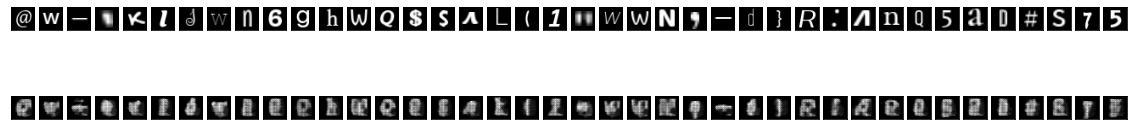

In [7]:
import matplotlib.pyplot as plt

n = 40
plt.figure(figsize=(20, 3))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(output_X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(test_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

After 10 epochs training, can simply get the performance of AE. Though there is some missing details, the shape of the image can be recognized.

As we know, the Autoencoder is made of two components, and it contains a quick reminder. The encoder gives the data from high dimensionals to a smallset neurons layer. The decoder takes the input generated by the encoder and convert them back into original shape.

The latent space contains a compressed representation of the image, which is the only information the decoder is allowed to use to try to reconstruct the input as faithfullyas possible. To perform well, the network has to learn to extract the most relevant features in the bottleneck.

Second

In [8]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

encoder_inputs = Input(shape = (28,28,1))
 
conv1 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(encoder_inputs)
pool1 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv1)
conv2 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(pool1)
pool2 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv2)
flat = Flatten()(pool2)
 
encoder_outputs = Dense(64, activation = 'relu')(flat)

In [9]:
#AE decoder
dense_layer_d = Dense(7*7*32, activation = 'relu')(encoder_outputs)
output_from_d = Reshape((7,7,32))(dense_layer_d)
conv1_1 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(output_from_d)
upsampling_1 = Conv2DTranspose(32, 3, padding='same', activation='relu', strides=(2, 2))(conv1_1)
upsampling_2 = Conv2DTranspose(32, 3, padding='same', activation='relu', strides=(2, 2))(upsampling_1)
decoded_outputs = Conv2DTranspose(1, 3, padding='same', activation='relu')(upsampling_2)

#AE
autoencoder = Model(encoder_inputs, decoded_outputs)

m = 128
n_epoch = 10
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(output_X_train,output_X_train, epochs=n_epoch, batch_size=m, shuffle=True)

Epoch 1/10
1714/1714 [==============================] - 468s 272ms/step - loss: 0.1733
Epoch 2/10
1714/1714 [==============================] - 466s 272ms/step - loss: 0.1475
Epoch 3/10
1714/1714 [==============================] - 461s 269ms/step - loss: 0.1505
Epoch 4/10
1714/1714 [==============================] - 458s 267ms/step - loss: 0.1445
Epoch 5/10
1714/1714 [==============================] - 468s 273ms/step - loss: 0.1301
Epoch 6/10
1714/1714 [==============================] - 466s 272ms/step - loss: 0.1278
Epoch 7/10
1714/1714 [==============================] - 497s 290ms/step - loss: 0.1332
Epoch 8/10
1714/1714 [==============================] - 495s 289ms/step - loss: 0.1331
Epoch 9/10
1714/1714 [==============================] - 487s 284ms/step - loss: 0.1224
Epoch 10/10
1714/1714 [==============================] - 473s 276ms/step - loss: 0.1205


1714/1714 [==============================] - 41s 24ms/step


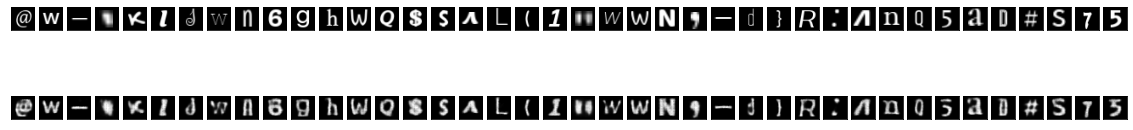

In [10]:
test_imgs = autoencoder.predict(output_X_test)

n = 40
plt.figure(figsize=(20, 3))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(output_X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(test_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


Third

In [11]:
encoder_inputs = Input(shape = (28,28,1))
 
conv1 = Conv2D(16, (3,3), activation = 'relu', padding = "SAME")(encoder_inputs)
pool1 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv1)
conv2 = Conv2D(64, (3,3), activation = 'relu', padding = "SAME")(pool1)
pool2 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv2)
flat = Flatten()(pool2)
 
encoder_outputs = Dense(64, activation = 'relu')(flat)

In [12]:
#AE decoder
dense_layer_d = Dense(7*7*32, activation = 'relu')(encoder_outputs)
output_from_d = Reshape((7,7,32))(dense_layer_d)
conv1_1 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(output_from_d)
upsampling_1 = Conv2DTranspose(64, 3, padding='same', activation='relu', strides=(2, 2))(conv1_1)
upsampling_2 = Conv2DTranspose(16, 3, padding='same', activation='relu', strides=(2, 2))(upsampling_1)
decoded_outputs = Conv2DTranspose(1, 3, padding='same', activation='relu')(upsampling_2)

#AE
autoencoder = Model(encoder_inputs, decoded_outputs)

m = 128
n_epoch = 10
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(output_X_train,output_X_train, epochs=n_epoch, batch_size=m, shuffle=True)

Epoch 1/10
1714/1714 [==============================] - 426s 248ms/step - loss: 0.1686
Epoch 2/10
1714/1714 [==============================] - 421s 246ms/step - loss: 0.1305
Epoch 3/10
1714/1714 [==============================] - 424s 247ms/step - loss: 0.1343
Epoch 4/10
1714/1714 [==============================] - 437s 255ms/step - loss: 0.1274
Epoch 5/10
1714/1714 [==============================] - 440s 257ms/step - loss: 0.1347
Epoch 6/10
1714/1714 [==============================] - 436s 254ms/step - loss: 0.1244
Epoch 7/10
1714/1714 [==============================] - 435s 254ms/step - loss: 0.1194
Epoch 8/10
1714/1714 [==============================] - 437s 255ms/step - loss: 0.1141
Epoch 9/10
1714/1714 [==============================] - 437s 255ms/step - loss: 0.1183
Epoch 10/10
1714/1714 [==============================] - 442s 258ms/step - loss: 0.1169


1714/1714 [==============================] - 40s 23ms/step


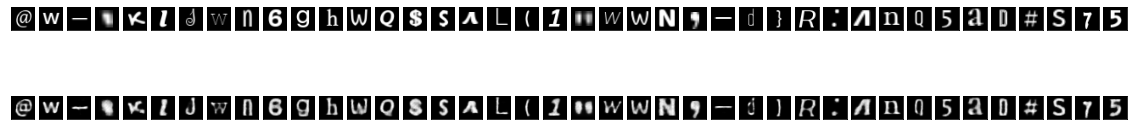

In [13]:
test_imgs = autoencoder.predict(output_X_test)

n = 40
plt.figure(figsize=(20, 3))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(output_X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(test_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

I change the pooling and sampling and get a better output, now outputs shows more details and much more clear than before. Also, the latest one runs the quickest. So we can assume from the results above that the third one gives us the best trade off of network architecture and latent space size.

Reference

[1] Autoencoder https://en.wikipedia.org/wiki/Autoencoder

[2] https://www.jeremyjordan.me/autoencoders/

Copyright 2022 Haoyuan Qin

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.